In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [192]:
data = pd.read_csv('ExpData.dat', delimiter='\s+')

In [193]:
data

,x,y,xdelta,ydelta
0,1.000,0.00073,0.02,0.00004
1,1.125,0.00080,0.02,0.00004
2,1.250,0.00082,0.02,0.00004
3,1.375,0.00091,0.02,0.00003
4,1.500,0.00105,0.02,0.00003
5,1.625,0.00109,0.02,0.00003
6,1.750,0.00115,0.02,0.00003
7,1.875,0.00132,0.02,0.00003
8,2.000,0.00135,0.02,0.00002
9,2.125,0.00146,0.02,0.00002


In [194]:
# Добавьте столбец с константой (интерцептом)
data['const'] = 1

In [195]:
sigma = 0.02

In [196]:
# Создайте модель линейной регрессии
model = sm.GLS(data['y'], data[['const', 'x']], hasconst=True, sigma=data['ydelta'])

In [197]:
results = model.fit()
print(results.summary())

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            GLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     791.5
Date:                Thu, 12 Oct 2023   Prob (F-statistic):           4.40e-10
Time:                        18:15:44   Log-Likelihood:                 99.372
No. Observations:                  11   AIC:                            -194.7
Df Residuals:                       9   BIC:                            -193.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        8.24e-06   4.26e-05      0.193      0.8

d:\Programs\Programming\WPy64\python-3.11.3.amd64\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [198]:

# Получите оцененные коэффициенты
beta = results.params

# Рассчитайте остатки
residuals = data['y'] - data[['const', 'x']] @ beta

# Рассчитайте статистику хи-квадрат
chi2 =  residuals @ np.diag(1/data['ydelta']**2) @ residuals

# Выведите значение статистики хи-квадрат
print(f"Значение статистики хи-квадрат: {chi2}")

adjusted_chi2 = chi2 / (len(data) - len(beta))

# Выведите значение приведенной статистики хи-квадрат
print(f"Приведенное значение статистики хи-квадрат: {adjusted_chi2}")


Значение статистики хи-квадрат: 10.141725889357923
Приведенное значение статистики хи-квадрат: 1.1268584321508803


In [199]:
slope = results.params['x']
intercept = results.params['const']

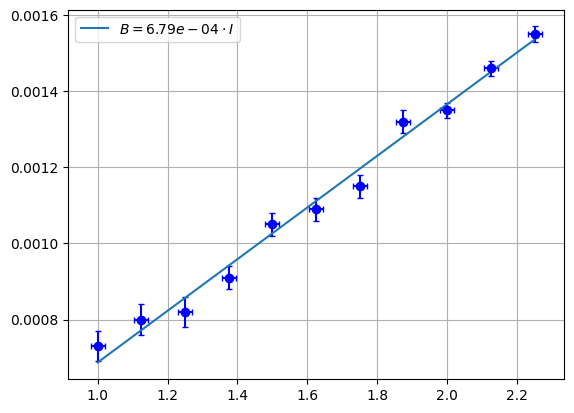

In [200]:
plt.errorbar(data.x, data.y, xerr=data.xdelta, yerr=data.ydelta, fmt='o', color='blue', capsize=2)
plt.plot(data.x, intercept + slope * data.x, label=rf'$B = {slope:.2e} \cdot I$')
plt.grid(which='both')
plt.legend()
plt.show()
